# Visualizing Nairobi Matatus Map

Data source:

http://www.digitalmatatus.com/map.html

Import libraries.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

### Load GTFS data

In [539]:
agency = pd.read_csv('gtfs/agency.txt')
calendar_dates = pd.read_csv('gtfs/calendar_dates.txt')
calendar = pd.read_csv('gtfs/calendar.txt')
routes = pd.read_csv('gtfs/routes.txt')
shapes = pd.read_csv('gtfs/shapes.txt')
stop_times = pd.read_csv('gtfs/stop_times.txt')
stops = pd.read_csv('gtfs/stops.txt')
trips = pd.read_csv('gtfs/trips.txt')

### Preview the data

In [540]:
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,UON,Approved SACCOs - University of Nairobi C4D La...,http://www.digitalmatatus.com,Africa/Nairobi,en,020 - 2729200


In [541]:
calendar_dates.head()

,service_id,date,exception_type
0,SPCDY,20140310,2
1,DAILY,20140526,2
2,MSHJA,20141020,2
3,JMHRI,20141212,2
4,MSHJA,20181020,2


In [542]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,DAILY,1,1,1,1,1,1,1,20140101,20181231
1,SPCDY,1,1,1,1,1,1,1,20140101,20181231
2,MSHJA,1,0,0,0,0,0,0,20141020,20181020
3,JMHRI,0,0,0,0,1,0,0,20141212,20181212


In [543]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
0,10000107D11,UON,107D,NaN,Ruaka-Ruiru,3
1,10000114011,UON,114R,NaN,Ngara-Rwaka-Ndenderu-Limuru,3
2,10000116011,UON,116,NaN,Koja-Ngara-Banana-Limuru,3
3,10100011A11,UON,11A,NaN,Odeon-Aga Khan-Highridge,3
4,10200010811,UON,108,NaN,UN-New Muthaiga-Gachie-Gichagi,3


In [544]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence
0,10106110,-1.173768,36.758759,1
1,10106110,-1.178175,36.760429,2
2,10106110,-1.184161,36.763878,3
3,10106110,-1.184837,36.764484,4
4,10106110,-1.185179,36.764935,5


In [545]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,10106110,6:00:00,6:00:00,0100MOM,1
1,10106110,6:05:00,6:05:00,0100LIK,2
2,10106110,6:10:00,6:10:00,0100CHL,3
3,10106110,6:15:00,6:15:00,0100VIN,4
4,10106110,6:20:00,6:20:00,0100NJT,5


In [546]:
stops.head()

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,81178,87,-1.258224,36.701905,NaN,NaN
1,0001RLW,Railways Terminus,-1.290884,36.828242,1,NaN
2,0002KOJ,Koja Terminus,-1.281230,36.822596,1,NaN
3,0003NGR,Ngara,-1.274395,36.823806,1,NaN
4,0004ODN,Odeon,-1.282769,36.825032,1,NaN


In [547]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,shape_id
0,10000107D11,DAILY,1107D110,Rwaka,0,1107D110
1,10000107D11,DAILY,1107D111,Ruiru,1,1107D111
2,10000114011,DAILY,10114110,Ngara,0,10114110
3,10000114011,DAILY,10114111,Limuru,1,10114111
4,10000116011,DAILY,10116110,Koja,0,10116110


### Merge calendar, service_id and trip_id information

In [548]:
service_trip_id = pd.merge(calendar[['service_id']],trips[['service_id', 'trip_id', 'route_id']])
service_trip_id.head()

,service_id,trip_id,route_id
0,DAILY,1107D110,10000107D11
1,DAILY,1107D111,10000107D11
2,DAILY,10114110,10000114011
3,DAILY,10114111,10000114011
4,DAILY,10116110,10000116011


In [549]:
service_trip_id = pd.merge(service_trip_id, routes[['route_id', 'route_short_name']])
service_trip_id.head()

,service_id,trip_id,route_id,route_short_name
0,DAILY,1107D110,10000107D11,107D
1,DAILY,1107D111,10000107D11,107D
2,DAILY,10114110,10000114011,114R
3,DAILY,10114111,10000114011,114R
4,DAILY,10116110,10000116011,116


In [550]:
stop_times = pd.merge(stop_times, service_trip_id[['trip_id', 'route_short_name']])
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,route_short_name
0,10106110,6:00:00,6:00:00,0100MOM,1,106
1,10106110,6:05:00,6:05:00,0100LIK,2,106
2,10106110,6:10:00,6:10:00,0100CHL,3,106
3,10106110,6:15:00,6:15:00,0100VIN,4,106
4,10106110,6:20:00,6:20:00,0100NJT,5,106


In [551]:
stop_times.route_short_name.value_counts()

111       110
115       106
126       106
110       101
135        99
114R       92
114W       91
102        90
116        89
24         87
103        87
24C        84
2          79
17Aky      78
106        77
4W         76
110ATH     76
107        75
16/62      74
105        74
19Cdc      73
125        70
237        69
1961K      68
36         67
1960       66
119        66
18C        65
120        65
17B        62
         ... 
28         26
108        26
129        25
3560_2     25
45G        25
107D       24
33MKR      24
33SB       24
46Y        24
43         23
33IMR      22
126N       22
110AK      21
33NG       20
145B       20
11C        19
145D       19
3N         17
14A        17
7C         16
29/30      16
53         16
14B        16
16         14
6E         12
2030       11
23W        11
405        11
7           9
45P         7
Name: route_short_name, dtype: int64

In [421]:
calendar = pd.merge(calendar,service_trip_id)
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


### Add abritrary arrival and departure dates to timetables

Define a function to add arrival dates to stop_times tables. We will use Monday 1/2/17 as the start date because it is the first Monday in 2017. This code deals with arrival times > 24 hours and converts them to 1/3/17.

In [422]:
arbitrary_dates = ['1/2/2017', '1/3/2017']

In [423]:
def add_arrival_date(df, dates = arbitrary_dates):
    df = df.copy()
    arrival_date = []
    arrival_time = []

    for i in df['arrival_time']:
        hour = i[:i.find(':')]
        minute = i[i.find(':')+1:i.find(':',4)]
        second = i[i.find(':',5)+1:]
        
        if int(hour) < 24:
            arrival_date.append(dates[0])
            arrival_time.append(i)
        elif 24 <= int(hour) < 48:
            arrival_date.append(dates[1])
            hour = int(hour) - 24
            arrival_time.append(str(hour)+":"+minute+":"+second)
        else:
            arrival_date.append('NA')
            
    df['arrival_date'] = arrival_date
    df['arrival_time'] = arrival_time
    return df

Define a function to add departure dates to stop_times tables. We will use 1/5/15 as the start date because that is the date we are currently using to visualize taxi trips. This code deals with departure times > 24 hours and converts them to 1/6/15.

In [424]:
def add_departure_date(df, dates = arbitrary_dates):
    df = df.copy()
    departure_date = []
    departure_time = []

    for i in df['departure_time']:
        hour = i[:i.find(':')]
        minute = i[i.find(':')+1:i.find(':',4)]
        second = i[i.find(':',5)+1:]
        
        if int(hour) < 24:
            departure_date.append(dates[0])
            departure_time.append(i)
        elif 24 <= int(hour) < 48:
            departure_date.append(dates[1])
            hour = int(hour) - 24
            departure_time.append(str(hour)+":"+minute+":"+second)
        else:
            departure_date.append('NA')
            
    df['departure_date'] = departure_date
    df['departure_time'] = departure_time
    return df

### Get timetables for each day of the week

In [425]:
monday = calendar[calendar['monday'] == 1]
tuesday = calendar[calendar['tuesday'] == 1]
wednesday = calendar[calendar['wednesday'] == 1]
thursday = calendar[calendar['thursday'] == 1]
friday = calendar[calendar['friday'] == 1]
saturday = calendar[calendar['saturday'] == 1]
sunday = calendar[calendar['sunday'] == 1]

### Monday

In [426]:
monday.head(2)

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D


In [427]:
monday_trips = monday['trip_id']
print "There are ", len(monday_trips), "trips on Monday"
monday_trips.head()

There are  264 trips on Monday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [428]:
monday_trips.tail()

259    8048C111
260    80030110
261    80030111
262    80105110
263    80105111
Name: trip_id, dtype: object

Make a dataframe for every trip in monday_trips and append it to triplist.

In [429]:
triplist = []
count = 0

for i in monday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:49:04.199804 finished trip number 100 / 264
2017-04-05 21:49:08.685519 finished trip number 200 / 264


In [430]:
triplist[0].head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,107D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.929530
1,107D,2017-01-02 06:05:00,2017-01-02 06:10:00,300,-1.151888,36.929530,-1.152181,36.919882
2,107D,2017-01-02 06:10:00,2017-01-02 06:15:00,300,-1.152181,36.919882,-1.155235,36.926119
3,107D,2017-01-02 06:15:00,2017-01-02 06:20:00,300,-1.155235,36.926119,-1.186098,36.906817
4,107D,2017-01-02 06:20:00,2017-01-02 06:25:00,300,-1.186098,36.906817,-1.211080,36.874725


In [431]:
len(triplist)

264

In [432]:
triplist[0]

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,107D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.929530
1,107D,2017-01-02 06:05:00,2017-01-02 06:10:00,300,-1.151888,36.929530,-1.152181,36.919882
2,107D,2017-01-02 06:10:00,2017-01-02 06:15:00,300,-1.152181,36.919882,-1.155235,36.926119
3,107D,2017-01-02 06:15:00,2017-01-02 06:20:00,300,-1.155235,36.926119,-1.186098,36.906817
4,107D,2017-01-02 06:20:00,2017-01-02 06:25:00,300,-1.186098,36.906817,-1.211080,36.874725
5,107D,2017-01-02 06:25:00,2017-01-02 06:30:00,300,-1.211080,36.874725,-1.214993,36.864388
6,107D,2017-01-02 06:30:00,2017-01-02 06:35:00,300,-1.214993,36.864388,-1.215396,36.850591
7,107D,2017-01-02 06:35:00,2017-01-02 06:40:00,300,-1.215396,36.850591,-1.215510,36.835114
8,107D,2017-01-02 06:40:00,2017-01-02 06:45:00,300,-1.215510,36.835114,-1.215553,36.814957
9,107D,2017-01-02 06:45:00,2017-01-02 06:50:00,300,-1.215553,36.814957,-1.212092,36.804714


Concatenate the list of dataframes:

In [433]:
data = pd.concat(triplist)

In [434]:
data.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,107D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.929530
1,107D,2017-01-02 06:05:00,2017-01-02 06:10:00,300,-1.151888,36.929530,-1.152181,36.919882
2,107D,2017-01-02 06:10:00,2017-01-02 06:15:00,300,-1.152181,36.919882,-1.155235,36.926119
3,107D,2017-01-02 06:15:00,2017-01-02 06:20:00,300,-1.155235,36.926119,-1.186098,36.906817
4,107D,2017-01-02 06:20:00,2017-01-02 06:25:00,300,-1.186098,36.906817,-1.211080,36.874725


In [435]:
data.tail()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
31,105,2017-01-02 08:35:00,2017-01-02 08:40:00,300,-1.269190,36.806400,-1.270490,36.806942
32,105,2017-01-02 08:40:00,2017-01-02 08:45:00,300,-1.270490,36.806942,-1.274128,36.811825
33,105,2017-01-02 08:45:00,2017-01-02 08:50:00,300,-1.274128,36.811825,-1.280986,36.816241
34,105,2017-01-02 08:50:00,2017-01-02 08:55:00,300,-1.280986,36.816241,-1.282757,36.825048
35,105,2017-01-02 08:55:00,2017-01-02 08:55:00,0,-1.282757,36.825048,-1.282757,36.825048


In [436]:
len(data)

6121

Filter out points with tripduration = 0.

In [437]:
data = data[data.tripduration != 0]

In [438]:
len(data)

5813

In [439]:
data.columns.to_series().groupby(df.dtypes).groups

{}

Sort by starttime:

In [440]:
data = data.sort_values(by='starttime')

In [441]:
data = data.reset_index(drop=True)

In [442]:
data.to_csv('nairobi_monday_raw.csv')

See how pandas leaves a blank first column with the index?

In [443]:
%%bash 

head nairobi_monday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,28,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
1,107D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
2,145D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,145D,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,53,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
5,126N,2017-01-02 06:00:00,2017-01-02 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
6,53,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
7,24,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
8,24,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


We need to delete it. Bash command to remove first column from csv output:

In [444]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' nairobi_monday_raw.csv > nairobi_monday.csv

In [445]:
%%bash

head nairobi_monday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-02 06:00:00,2017-01-02 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Tuesday

In [446]:
tuesday.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


In [447]:
tuesday_trips = tuesday['trip_id']
print "There are ", len(tuesday_trips), "trips on Tuesday"
tuesday_trips.head()

There are  264 trips on Tuesday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [448]:
arbitrary_dates = ['1/3/2017', '1/4/2017']

In [449]:
triplist = []
count = 0

for i in tuesday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:49:26.461725 finished trip number 100 / 264
2017-04-05 21:49:31.399376 finished trip number 200 / 264


In [450]:
data = pd.concat(triplist)

In [451]:
len(data)

6121

In [452]:
data = data[data.tripduration != 0]

In [453]:
len(data)

5813

In [454]:
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)

In [455]:
data.to_csv('data/nairobi_tuesday_raw.csv')

In [456]:
%%bash 

head data/nairobi_tuesday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,28,2017-01-03 05:59:00,2017-01-03 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
1,107D,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
2,145D,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,145D,2017-01-03 06:00:00,2017-01-03 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,53,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
5,126N,2017-01-03 06:00:00,2017-01-03 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
6,53,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
7,24,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
8,24,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


In [457]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_tuesday_raw.csv > data/nairobi_tuesday.csv

In [458]:
%%bash 

head data/nairobi_tuesday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-03 05:59:00,2017-01-03 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-03 06:00:00,2017-01-03 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-03 06:00:00,2017-01-03 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-03 06:00:00,2017-01-03 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Wednesday

In [459]:
wednesday.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


In [460]:
wednesday_trips = wednesday['trip_id']
print "There are ", len(wednesday_trips), "trips on Wednesday"
wednesday_trips.head()

There are  264 trips on Wednesday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [461]:
arbitrary_dates = ['1/4/2017', '1/5/2017']

In [462]:
triplist = []
count = 0

for i in wednesday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:49:39.695834 finished trip number 100 / 264
2017-04-05 21:49:44.134226 finished trip number 200 / 264


In [463]:
data = pd.concat(triplist)

In [464]:
data = data[data.tripduration != 0]
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)
data.to_csv('data/nairobi_wednesday_raw.csv')

In [465]:
%%bash 

head data/nairobi_wednesday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,28,2017-01-04 05:59:00,2017-01-04 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
1,107D,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
2,145D,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,145D,2017-01-04 06:00:00,2017-01-04 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,53,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
5,126N,2017-01-04 06:00:00,2017-01-04 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
6,53,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
7,24,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
8,24,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


In [466]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_wednesday_raw.csv > data/nairobi_wednesday.csv

In [467]:
%%bash 

head data/nairobi_wednesday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-04 05:59:00,2017-01-04 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-04 06:00:00,2017-01-04 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-04 06:00:00,2017-01-04 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-04 06:00:00,2017-01-04 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Thursday

In [468]:
thursday.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


In [469]:
thursday_trips = thursday['trip_id']
print "There are ", len(thursday_trips), "trips on Thursday"
thursday_trips.head()

There are  264 trips on Thursday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [470]:
arbitrary_dates = ['1/5/2017', '1/6/2017']

In [471]:
triplist = []
count = 0

for i in thursday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:49:52.217471 finished trip number 100 / 264
2017-04-05 21:49:56.767403 finished trip number 200 / 264


In [472]:
data = pd.concat(triplist)
data = data[data.tripduration != 0]
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)
data.to_csv('data/nairobi_thursday_raw.csv')

In [473]:
%%bash 

head data/nairobi_thursday_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,28,2017-01-05 05:59:00,2017-01-05 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
1,107D,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
2,145D,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,145D,2017-01-05 06:00:00,2017-01-05 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,53,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
5,126N,2017-01-05 06:00:00,2017-01-05 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
6,53,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
7,24,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
8,24,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


In [474]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_thursday_raw.csv > data/nairobi_thursday.csv

In [475]:
%%bash 

head data/nairobi_thursday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-05 05:59:00,2017-01-05 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-05 06:00:00,2017-01-05 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-05 06:00:00,2017-01-05 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-05 06:00:00,2017-01-05 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Friday

In [476]:
friday.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


In [477]:
friday_trips = friday['trip_id']
print "There are ", len(friday_trips), "trips on Friday"
friday_trips.head()

There are  264 trips on Friday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [478]:
arbitrary_dates = ['1/6/2017', '1/7/2017']

In [479]:
triplist = []
count = 0

for i in friday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:50:04.907653 finished trip number 100 / 264
2017-04-05 21:50:09.424029 finished trip number 200 / 264


In [480]:
data = pd.concat(triplist)
data = data[data.tripduration != 0]
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)
data.to_csv('data/nairobi_friday_raw.csv')

In [481]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_friday_raw.csv > data/nairobi_friday.csv

In [482]:
%%bash 

head data/nairobi_friday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-06 05:59:00,2017-01-06 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-06 06:00:00,2017-01-06 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-06 06:00:00,2017-01-06 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-06 06:00:00,2017-01-06 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-06 06:00:00,2017-01-06 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-06 06:00:00,2017-01-06 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-06 06:00:00,2017-01-06 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-06 06:00:00,2017-01-06 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-06 06:00:00,2017-01-06 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Saturday

In [483]:
saturday.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


In [484]:
saturday_trips = saturday['trip_id']
print "There are ", len(saturday_trips), "trips on Saturday"
saturday_trips.head()

There are  264 trips on Saturday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [485]:
arbitrary_dates = ['1/7/2017', '1/8/2017']

In [486]:
triplist = []
count = 0

for i in saturday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:50:17.428871 finished trip number 100 / 264
2017-04-05 21:50:25.754173 finished trip number 200 / 264


In [487]:
data = pd.concat(triplist)
data = data[data.tripduration != 0]
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)
data.to_csv('data/nairobi_saturday_raw.csv')

In [488]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_saturday_raw.csv > data/nairobi_saturday.csv

In [489]:
%%bash

head data/nairobi_saturday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-07 05:59:00,2017-01-07 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-07 06:00:00,2017-01-07 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-07 06:00:00,2017-01-07 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-07 06:00:00,2017-01-07 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-07 06:00:00,2017-01-07 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-07 06:00:00,2017-01-07 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-07 06:00:00,2017-01-07 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-07 06:00:00,2017-01-07 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-07 06:00:00,2017-01-07 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Sunday

In [490]:
sunday.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,trip_id,route_id,route_short_name
0,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D110,10000107D11,107D
1,DAILY,1,1,1,1,1,1,1,20140101,20181231,1107D111,10000107D11,107D
2,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114110,10000114011,114R
3,DAILY,1,1,1,1,1,1,1,20140101,20181231,10114111,10000114011,114R
4,DAILY,1,1,1,1,1,1,1,20140101,20181231,10116110,10000116011,116


In [491]:
sunday_trips = sunday['trip_id']
print "There are ", len(sunday_trips), "trips on Sunday"
sunday_trips.head()

There are  264 trips on Sunday


0    1107D110
1    1107D111
2    10114110
3    10114111
4    10116110
Name: trip_id, dtype: object

In [492]:
arbitrary_dates = ['1/8/2017', '1/9/2017']

In [493]:
triplist = []
count = 0

for i in sunday_trips:
    count += 1
    df = stop_times[stop_times['trip_id'] == i]
    
    # add arrival and departure dates
    df = add_arrival_date(df, dates = arbitrary_dates)
    df = add_departure_date(df, dates = arbitrary_dates)
    df['arrival_datetime'] = pd.to_datetime(df['arrival_date'] + ' ' + df['arrival_time'])
    df['departure_datetime'] = pd.to_datetime(df['departure_date'] + ' ' + df['departure_time'])

    # join df with stops
    df = pd.merge(df, stops[['stop_id', 'stop_name', 'stop_lat', 'stop_lon']],left_on='stop_id', right_on='stop_id')

    # join df with trips to get direction id
    df = pd.merge(df, trips[['trip_id', 'direction_id', 'route_id']], left_on='trip_id', right_on='trip_id', how='left')

    # join df with routes to get route id
    df = pd.merge(df, routes[['route_id', 'route_long_name']], left_on='route_id', right_on='route_id', how='left')
    
    # create new dataframe to store results
    legs = pd.DataFrame()
    legs['type_id'] = df['route_short_name']
    legs['starttime'] = df['departure_datetime']
    legs['stoptime'] = df['arrival_datetime'].shift(-1).fillna(method='ffill')
    legs['tripduration'] = ((legs['stoptime'] - legs['starttime'])/np.timedelta64(1, 's')).astype(int)
    legs['start_lat'] = df['stop_lat']
    legs['start_lon'] = df['stop_lon']
    legs['end_lat'] = legs['start_lat'].shift(-1).fillna(method='ffill')
    legs['end_lon'] = legs['start_lon'].shift(-1).fillna(method='ffill')
    
    # append results to triplist
    triplist.append(legs)
    
    if count % 100 == 0:
        print str(dt.datetime.now()), "finished trip number", count, "/", len(monday_trips)

2017-04-05 21:50:42.967111 finished trip number 100 / 264
2017-04-05 21:50:51.863508 finished trip number 200 / 264


In [494]:
data = pd.concat(triplist)
data = data[data.tripduration != 0]
data = data.sort_values(by='starttime')
data = data.reset_index(drop=True)
data.to_csv('data/nairobi_sunday_raw.csv')

In [495]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_sunday_raw.csv > data/nairobi_sunday.csv

In [496]:
%%bash

head data/nairobi_sunday.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
28,2017-01-08 05:59:00,2017-01-08 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
107D,2017-01-08 06:00:00,2017-01-08 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
145D,2017-01-08 06:00:00,2017-01-08 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
145D,2017-01-08 06:00:00,2017-01-08 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
53,2017-01-08 06:00:00,2017-01-08 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
126N,2017-01-08 06:00:00,2017-01-08 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
53,2017-01-08 06:00:00,2017-01-08 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
24,2017-01-08 06:00:00,2017-01-08 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
24,2017-01-08 06:00:00,2017-01-08 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


### Merge the Separate Days into One Full Week

In [497]:
monday_output = pd.read_csv("data/nairobi_monday.csv")
tuesday_output = pd.read_csv("data/nairobi_tuesday.csv")
wednesday_output = pd.read_csv("data/nairobi_wednesday.csv")
thursday_output = pd.read_csv("data/nairobi_thursday.csv")
friday_output = pd.read_csv("data/nairobi_friday.csv")
saturday_output = pd.read_csv("data/nairobi_saturday.csv")
sunday_output = pd.read_csv("data/nairobi_sunday.csv")

In [498]:
fullweek_output = pd.concat([monday_output, tuesday_output, wednesday_output, thursday_output, friday_output, saturday_output, sunday_output])
fullweek_output.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,1,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.255400,36.878468,-1.255571,36.878086
1,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.929530
2,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,1,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015


In [398]:
fullweek_output.tail()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
5808,126,2017-01-08 10:40:00,2017-01-08 10:45:00,300,-1.311276,36.816904,-1.307931,36.819123
5809,126,2017-01-08 10:45:00,2017-01-08 10:50:00,300,-1.307931,36.819123,-1.305292,36.824734
5810,24,2017-01-08 10:45:00,2017-01-08 10:40:00,-300,-1.323235,36.708025,-1.323235,36.708025
5811,126,2017-01-08 10:50:00,2017-01-08 10:55:00,300,-1.305292,36.824734,-1.291494,36.823018
5812,126,2017-01-08 10:55:00,2017-01-08 11:00:00,300,-1.291494,36.823018,-1.290352,36.828268


In [506]:
import matplotlib.pyplot as plt
import seaborn as sns

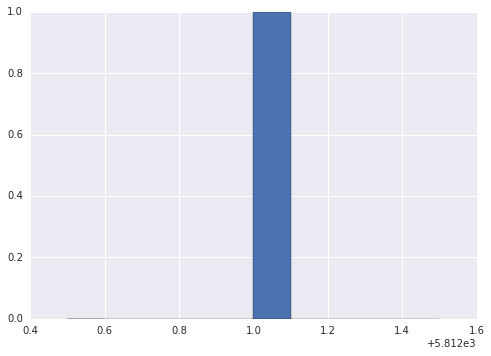

In [517]:
monday_output.type_id.value_counts().hist();

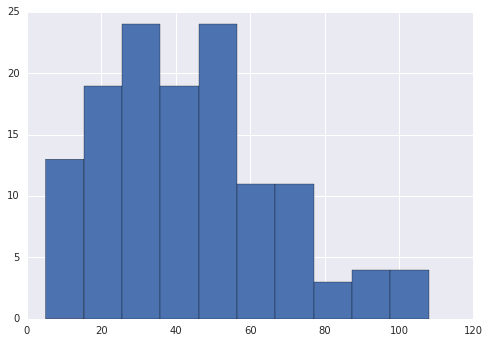

In [516]:
tuesday_output.type_id.value_counts().hist();

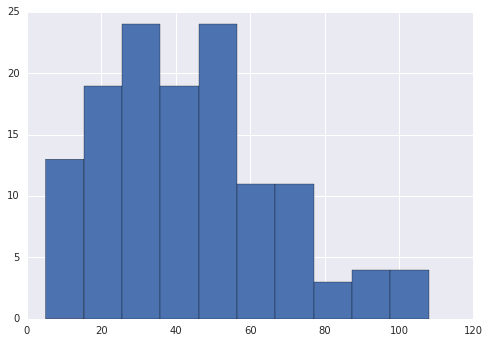

In [518]:
wednesday_output.type_id.value_counts().hist();

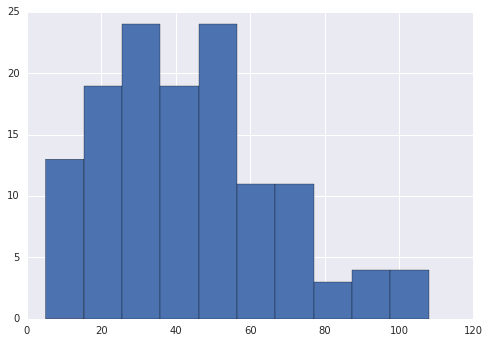

In [519]:
thursday_output.type_id.value_counts().hist();

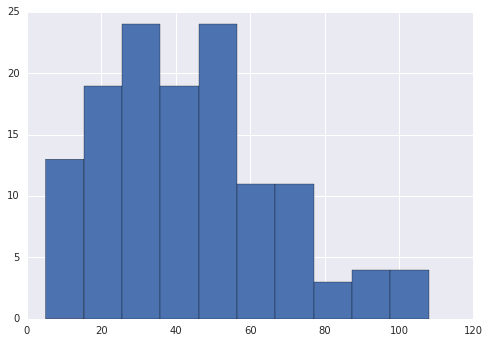

In [520]:
friday_output.type_id.value_counts().hist();

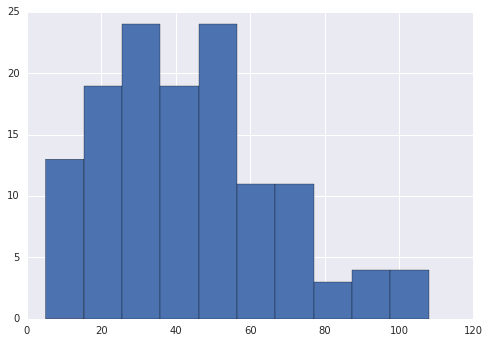

In [521]:
saturday_output.type_id.value_counts().hist();

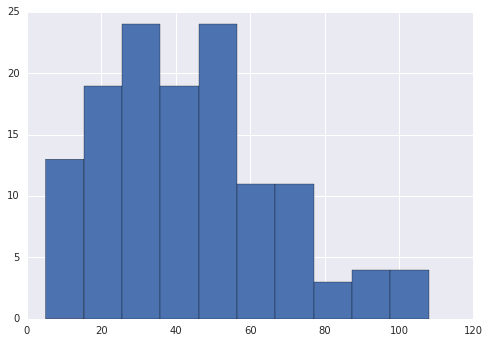

In [522]:
sunday_output.type_id.value_counts().hist();

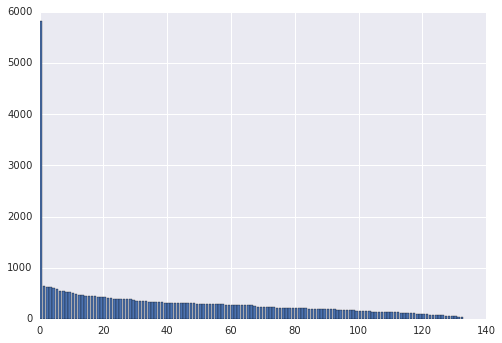

In [510]:
plt.bar(range(len(fullweek_output.type_id.value_counts())), fullweek_output.type_id.value_counts());

In [499]:
fullweek_output.sort_values('starttime')

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,1,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.255400,36.878468,-1.255571,36.878086
166,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.284634,36.826140,-1.292370,36.843730
167,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.330018,36.890475,-1.328278,36.892562
168,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.269880,36.920020,-1.271860,36.918720
169,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.207220,36.786020,-1.209340,36.788470
170,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.300840,36.888060,-1.299090,36.890830
171,1,2017-01-02 06:00:00,2017-01-02 06:10:00,600,-1.285635,36.830776,-1.272689,36.808988
172,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.265180,36.916560,-1.266440,36.916100
173,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.218232,36.891038,-1.212885,36.893063
174,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.285901,36.827633,-1.292370,36.843730


In [408]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_fullweek_raw.csv > data/nairobi_fullweek.csv

### Open GIS files in QGIS

Open GIS files in QGIS (http://www.digitalmatatus.com/map.html)

In [277]:
from IPython.display import Image

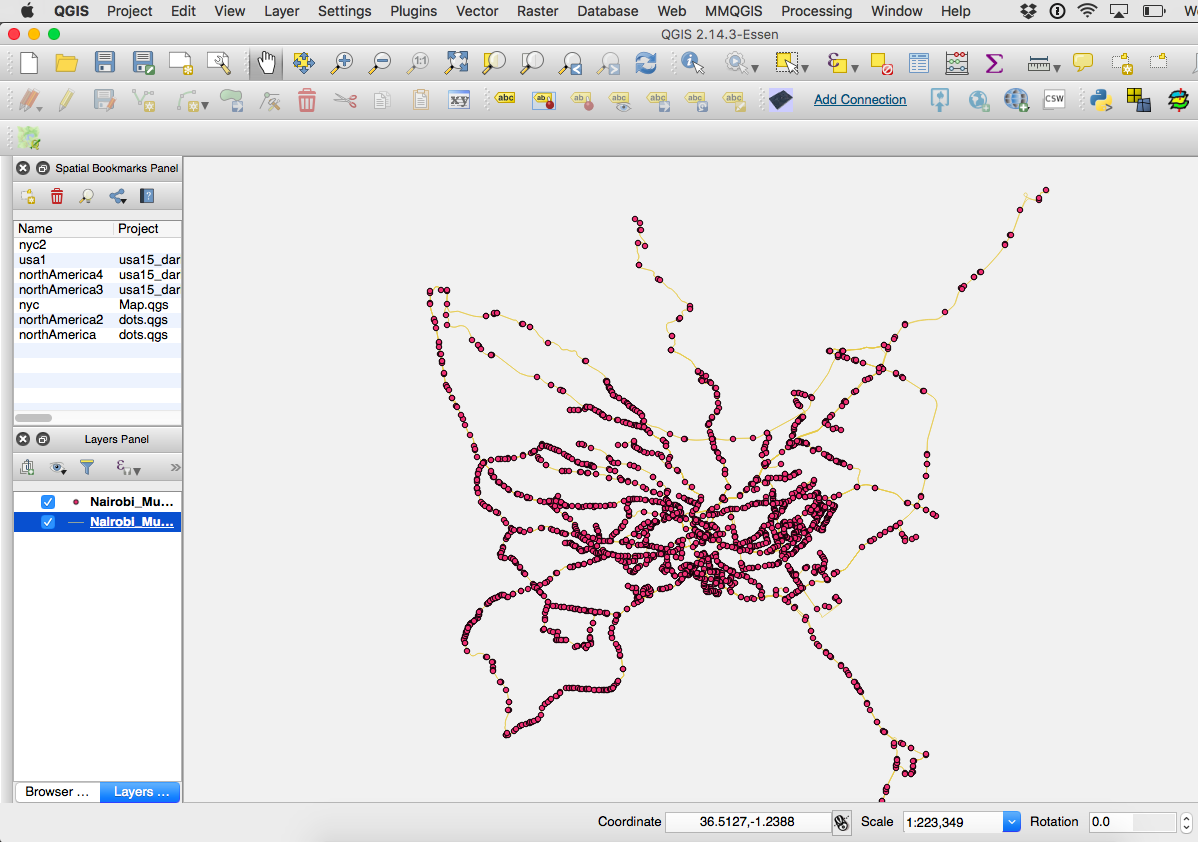

In [278]:
Image("http://i.imgur.com/pGdK8Fh.png")

Export route layter attributes table.

In [353]:
routes_layer = pd.read_csv("gis/routes/routes_table.csv")

In [354]:
routes_layer.head()

,route_id,rt_shrt_nm,route_desc,origin,destination,Shape_Length
0,10300106011,106,Odeon-UN-Ruaka-Banana,Koja,Banana,0.335262
1,10400010711,107,Odeon-UN-Ruaka-Ndenderu,Odeon,Ndenderu,0.366268
2,10200010811,108,UN-New Muthaiga-Gachie-Gichagi,UNEP,Gichagi,0.095792
3,10000114011,114R,Ngara-Rwaka-Ndenderu-Limuru,Ngara,Limuru,0.587139
4,10000116011,116,Koja-Ngara-Banana-Limuru,Koja,Limuru,0.638544


### Define color scheme for each route

Use route_short_name as unique identifier.

In [355]:
len(list(routes_layer.rt_shrt_nm))

133

In [356]:
list(routes_layer.rt_shrt_nm)

['106',
 '107',
 '108',
 '114R',
 '116',
 '11A',
 '11F',
 '107D',
 '145D',
 '6',
 '23W',
 '25',
 '42',
 '43',
 '44G',
 '44Z',
 '44K',
 '45K',
 '45G',
 '45P',
 '49',
 '53',
 '100',
 '120',
 '121',
 '145',
 '17B',
 '17B_2',
 '237',
 '25A',
 '100A',
 '2030',
 '29/30',
 '3N',
 '7',
 '14',
 '28',
 '32D',
 '41',
 '46H',
 '11C',
 '17Aky',
 '18C',
 '46B',
 '16/62',
 '3738',
 '6E',
 '10',
 '20',
 '23KS',
 '26',
 '26S',
 '33DP',
 '33DC',
 '33GTB',
 '33C',
 '34J',
 '36',
 '58',
 '17A',
 '19Cjk',
 '19Cdc',
 '19C2',
 '34B',
 '69',
 '405',
 '1960',
 '1961K',
 '1961Kd',
 '35/60',
 '3560_2',
 '04SK',
 '38/39',
 '70/71',
 '11',
 '11_2',
 '15',
 '16',
 '24',
 '24BK',
 '33IMR',
 '33TP',
 '33J',
 '33H',
 '33UTW',
 '33MKR',
 '110',
 '110AK',
 '110ATH',
 '125',
 '126',
 '126RK',
 '12C',
 '12D',
 '145B',
 '14A',
 '14B',
 '33FED',
 '33B',
 '46K',
 '46Y',
 '56',
 '7C',
 '1',
 '2',
 '3U',
 '5',
 '8',
 '32A',
 '33NG',
 '33SB',
 '34L',
 '4W',
 '102',
 '103',
 '111',
 '126N',
 '129',
 '24C',
 '23KG',
 '30',
 '48O'

In [389]:
for i in routes_layer.rt_shrt_nm:
    if i not in line_key.keys():
        print i

114R
107D
145D
23W
44G
44Z
44K
45K
45G
45P
53
17B_2
237
100A
2030
3N
7
28
32D
41
46H
11C
17Aky
46B
16/62
6E
23KS
26S
33DP
33DC
33GTB
33C
34J
19Cjk
19Cdc
1961K
1961Kd
3560_2
04SK
11_2
24BK
33IMR
33TP
33J
33H
33UTW
33MKR
110
126RK
145B
33FED
33B
46K
46Y
56
3U
5
32A
33NG
33SB
34L
126N
23KG
48O
48K
114W
119A


In [390]:
line_key = {
    '100': 'A',
    '120': 'A',
    '121': 'A',
    '17B': 'B',
    '25': 'B',
    '25A': 'B',
    '29/30': 'B',
    '43': 'B',
    '44': 'B',
    '44G': 'B', ##
    '44K': 'B', ##
    '44Z': 'B', ##
    '45': 'B',
    '45K': 'B', ##
    '45Z': 'B', ##
    '45P': 'B', ##
    '49': 'B',
    '145': 'B',
    '145D': 'B',
    '6': 'C',
    '14': 'C',
    '17A': 'C',
    '17AKY': 'C',
    '18C': 'C',
    '31': 'C',
    '32': 'C',
    '46': 'C',
    '3738': 'C',
    '10': 'D',
    '23': 'D',
    '23W': 'D', ##
    '26': 'D',
    '36': 'D',
    '58': 'D',
    '35/60': 'E',
    '38/39': 'E',
    '19C2': 'E',
    '48': 'Z',
    '48C': 'Z',
    '69': 'Z',
    '17B': 'F',
    '19C': 'F',
    '34B': 'F',
    '1960': 'F',
    '1961C': 'F',
    '1961CK': 'F',
    '33F': 'G',
    '33PJ': 'G',
    '33PM': 'G',
    '34': 'G',
    '70/71': 'G',
    '12C': 'H',
    '12D': 'H',
    '33': 'H',
    '110ATH': 'H',
    '110KIT': 'H',
    '14A': 'I',
    '14B': 'I',
    '15': 'I',
    '16': 'I',
    '34': 'I',
    '125': 'I',
    '126': 'I',
    '7C': 'J',
    '8': 'J',
    '24': 'J',
    '24C': 'J',
    '32': 'J',
    '33': 'J',
    '111': 'J',
    '108': 'Z',
    '110AK': 'Z',
    '2': 'K',
    '4W': 'K',
    '102': 'K',
    '46': 'L', # why are there two 46 lines?
    '48': 'M',
    '48A': 'M',
    '48B': 'M',
    '22': 'N',
    '23': 'N',
    '30': 'N',
    '105': 'N',
    '114R': 'N', ###
    '115': 'N',
    '118': 'O',
    '119': 'O',
    '103': 'O',
    '11B': 'O',
    '11A': 'P',
    '11F': 'P',
    '106': 'P',
    '107': 'P',
    '107D': 'P', ##
    '116': 'P',
    '1': 'Z',
    '6': 'Z',
    '11': 'Z',
    '20': 'Z',
    '24': 'Z',
    '33': 'Z',
    '107': 'Z',
    '42': 'Z',
    '129': 'Z',
    '239': 'Z',
    '405': 'Z'
}

In [391]:
lines_id_key = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
    'H': 8,
    'I': 9,
    'J': 10,
    'K': 11,
    'L': 12,
    'M': 13,
    'N': 14,
    'O': 15,
    'P': 16,
    'Z': 17
}

In [392]:
fullweek_output.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,1,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.255400,36.878468,-1.255571,36.878086
1,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.929530
2,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,1,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,1,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015


In [393]:
route_names = []

for i in fullweek_output.type_id:
    if i in line_key.keys():
        route_names.append(line_key[i])
    else:
        print "fail"
        
route_names

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


['P',
 'B',
 'B',
 'Z',
 'Z',
 'H',
 'B',
 'H',
 'A',
 'H',
 'A',
 'M',
 'A',
 'M',
 'H',
 'B',
 'Z',
 'Z',
 'I',
 'I',
 'B',
 'K',
 'I',
 'B',
 'B',
 'I',
 'I',
 'Z',
 'K',
 'B',
 'I',
 'B',
 'K',
 'K',
 'B',
 'Z',
 'I',
 'B',
 'Z',
 'A',
 'M',
 'J',
 'H',
 'Z',
 'H',
 'Z',
 'Z',
 'Z',
 'D',
 'J',
 'P',
 'J',
 'P',
 'O',
 'D',
 'B',
 'A',
 'A',
 'B',
 'M',
 'B',
 'B',
 'B',
 'B',
 'J',
 'O',
 'B',
 'I',
 'I',
 'N',
 'C',
 'C',
 'C',
 'Z',
 'Z',
 'F',
 'C',
 'F',
 'C',
 'G',
 'D',
 'G',
 'D',
 'D',
 'Z',
 'Z',
 'Z',
 'Z',
 'D',
 'N',
 'D',
 'D',
 'D',
 'O',
 'B',
 'B',
 'K',
 'B',
 'E',
 'E',
 'B',
 'E',
 'B',
 'Z',
 'B',
 'O',
 'Z',
 'K',
 'F',
 'I',
 'I',
 'F',
 'C',
 'O',
 'F',
 'F',
 'O',
 'E',
 'E',
 'C',
 'Z',
 'Z',
 'D',
 'P',
 'P',
 'N',
 'P',
 'Z',
 'O',
 'Z',
 'N',
 'O',
 'J',
 'J',
 'P',
 'J',
 'Z',
 'N',
 'N',
 'Z',
 'N',
 'N',
 'J',
 'Z',
 'B',
 'Z',
 'Z',
 'Z',
 'J',
 'F',
 'J',
 'B',
 'J',
 'C',
 'K',
 'O',
 'Z',
 'Z',
 'M',
 'I',
 'Z',
 'F',
 'B',
 'B',
 'J',
 'Z',
 'J'

In [374]:
route_ids = []

for i in route_names:
    if i in lines_id_key.keys():
        route_ids.append(lines_id_key[i])
    else:
        route_ids.append(17)

In [376]:
fullweek_output['type_id'] = route_ids

In [377]:
fullweek_output.head()

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,17,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.255400,36.878468,-1.255571,36.878086
1,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.929530
2,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,17,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015


In [380]:
fullweek_output.to_csv("data/nairobi_fullweek_colors_raw.csv")

In [381]:
%%bash

head data/nairobi_fullweek_colors_raw.csv

,type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
0,17,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
1,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
2,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
3,17,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
4,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
5,17,2017-01-02 06:00:00,2017-01-02 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
6,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
7,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
8,17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


In [382]:
%%bash

awk -F"," -v OFS="," '{ $1="" ; $0=substr($0,2) } 1' data/nairobi_fullweek_colors_raw.csv > data/nairobi_fullweek_colors_clean.csv

In [383]:
%%bash

head data/nairobi_fullweek_colors_clean.csv

type_id,starttime,stoptime,tripduration,start_lat,start_lon,end_lat,end_lon
17,2017-01-02 05:59:00,2017-01-02 06:00:00,60,-1.2554,36.878468,-1.255571,36.878086
17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.147565,36.959228,-1.151888,36.92953
17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.164449,36.955839,-1.160659,36.943904
17,2017-01-02 06:00:00,2017-01-02 06:04:00,240,-1.147707,36.959362,-1.151878,36.928673
17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.233597,36.872552,-1.226942,36.871015
17,2017-01-02 06:00:00,2017-01-02 06:02:00,120,-1.360832,36.655943,-1.36294,36.656181
17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.211112,36.874403,-1.214869,36.876151
17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.286043,36.826165,-1.292001,36.822352
17,2017-01-02 06:00:00,2017-01-02 06:05:00,300,-1.322047,36.707888,-1.318646,36.715664


In [384]:
%%bash

tail data/nairobi_fullweek_colors_clean.csv

14,2017-01-08 10:25:00,2017-01-08 10:30:00,300,-1.274128,36.811825,-1.280986,36.816241
17,2017-01-08 10:30:00,2017-01-08 10:35:00,300,-1.473498344,36.95957422,-1.477218,36.958032
9,2017-01-08 10:30:00,2017-01-08 10:35:00,300,-1.317562,36.812316,-1.315626,36.814272
14,2017-01-08 10:30:00,2017-01-08 10:35:00,300,-1.280986,36.816241,-1.280852,36.822802
9,2017-01-08 10:35:00,2017-01-08 10:40:00,300,-1.315626,36.814272,-1.311276,36.816904
9,2017-01-08 10:40:00,2017-01-08 10:45:00,300,-1.311276,36.816904,-1.307930946,36.81912303
9,2017-01-08 10:45:00,2017-01-08 10:50:00,300,-1.307930946,36.81912303,-1.305291653,36.82473421
17,2017-01-08 10:45:00,2017-01-08 10:40:00,-300,-1.323235,36.708025,-1.323235,36.708025
9,2017-01-08 10:50:00,2017-01-08 10:55:00,300,-1.305291653,36.82473421,-1.29149437,36.8230176
9,2017-01-08 10:55:00,2017-01-08 11:00:00,300,-1.29149437,36.8230176,-1.290352,36.828268


In [386]:
fullweek_output['type_id'].value_counts()

17    24497
9      1548
11     1434
10     1428
15     1416
14     1338
2      1284
3      1152
16     1128
4      1104
6      1044
1       948
8       942
5       852
13      348
7       228
Name: type_id, dtype: int64